# Part I - Loan Data from Prosper Dataset Exploration
## by Isaac Mwendwa

## Introduction

* The Loan Data from Prosper Dataset is a dataset of loans taken between 2005 and 2013 from Prosper
* The dataset contains 113,937 rows (loans) with 81 columns (loan variables) on each row
* In this exploratory analysis, we will be seeking to find insights on the relationships between the various loan variables e.g. 
> Borrower's APR, Prosper Score, Income Range, Debt to Income Ratio, Employment Status, Stated Monthly Income, Loan Year, and Employment Duration

### Preliminary Wrangling

#### Importing Packages

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Dataset

#### Defining Path of Working Directory

In [3]:
# Working Directory Path
working_dir = '/content/drive/My Drive/Colab_Notebooks/ALX_3/'

In [4]:
# Reading dataset into Pandas Dataframe

original_loans_df = pd.read_csv(working_dir + "prosperLoanData.csv")

In [5]:
# Making copy of dataset
loans_df = original_loans_df.copy()

#### Data Exploration

In [6]:
# Checking shape of dataframe
loans_df.shape

(113937, 81)

In [7]:
# Displaying columns
loans_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [8]:
# Checking info
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
# Checking first 5 rows
loans_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [10]:
# Summary Statistics
loans_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [11]:
# Checking missing values
loans_df.isnull()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Checking missing values
loans_df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [13]:
# checking datatype of object
type(loans_df.isnull().sum())

pandas.core.series.Series

### What is the structure of your dataset?

> * The dataset contains 113,937 rows (loans) with 81 columns (loan variables)
* The loan variables consist of qualitative (ordinal and nominal) and quantitative features


### What is/are the main feature(s) of interest in your dataset?

> The main features of interest (response variables) in the dataset include:
* Borrower's APR
* Prosper Score
* Debt to Income Ratio 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The predictor features include:
* Income Range
* Employment Status
* Stated Monthly Income
* Loan Year
* Employment Duration 

## Univariate Exploration


* Here, we will look at the distributions of single variables
* The exploration will first start with the distribution of the response features, and then proceed to the distribution of the predictor variables
* We will define some univariate plotting functions, to prevent code repetition and increase code re-usability 

### Definition of Plotting Functions

#### Vertical Bar Chart Function Definition

In [14]:
# function to draw vertical bar chart

def vertical_bar_chart(df, column):

    base_color = sb.color_palette()[0]
    sb.countplot(data = df, x = column, color = base_color)

#### Horizontal Bar Chart Function Definition

In [15]:
# Function to plot horizontal bar chart

def draw_horizontal_bar(df_column, title):
  data_series = df_column.value_counts().sort_values()
  ax = data_series.plot(kind="barh", figsize=(10, 6), color='#6495ED', zorder=2, width=0.85)
  ax.set_title(title, weight='bold', size=12)
  # Draw vertical axis lines
  vals = ax.get_xticks()
  for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    

#### Histogram Function Definition


In [16]:
# function to draw histogram

def histogram(df, column):
  sb.displot(df[column])

### Univariate Exploration Plots

#### Plot 1: What is the Distribution of Borrower APR?

Definition: **BorrowerAPR**
* The Borrower's Annual Percentage Rate (APR) for the loan

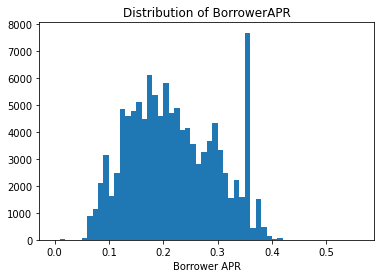

In [17]:
bins = np.arange(0, loans_df['BorrowerAPR'].max() + 0.05, 0.01)
plt.hist(data = loans_df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Distribution of BorrowerAPR');

* The distribution of BorrowerAPR is largely multimodal, with small peaks around 0.1 and 0.3
* There is a large peak around 0.2; and a big steep peak around 0.35
* The steep peak around 0.35 is of interest; and will be explored further

#### Plot 2: What is the Distribution of ProsperScore?

Definition: **ProsperScore**
* A custom risk score built using historical Prosper data. 
* The score ranges from 1-10, with 10 being the best, or lowest risk score


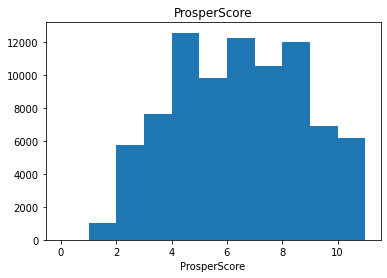

In [18]:
bins = np.arange(0, loans_df['ProsperScore'].max() + 1, 1)
plt.hist(data = loans_df, x = 'ProsperScore', bins = bins);
plt.xlabel('ProsperScore');
plt.title('ProsperScore');

* The distribution of ProsperScore is multimodal, and fairly symmetric
* There a 3 peaks (around 4.5, 6.5, and 8.5)

#### Plot 3: How many Borrowers are Home-owners?

Definition: **IsBorrowerHomeowner**
* A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming
they are a homeowner

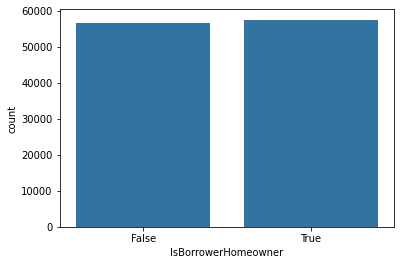

In [19]:
# Calling Vertical Bar Chart Drawing Function
vertical_bar_chart(loans_df, 'IsBorrowerHomeowner')

* There is a small difference between the number of borrowers who are home-owners and those who are not home-owners
* This implies that the variable does not have a major influence on borrowing

#### Plot 4: What is the Distribution of Loan Original Amount?

Definition: **LoanOriginalAmount**
* The origination amount of the loan

In [20]:
# Defining min and max of LoanOriginalAmount Column
min = loans_df['LoanOriginalAmount'].min()
max = loans_df['LoanOriginalAmount'].max()

print("Min:", min)
print("Max:", max)

Min: 1000
Max: 35000


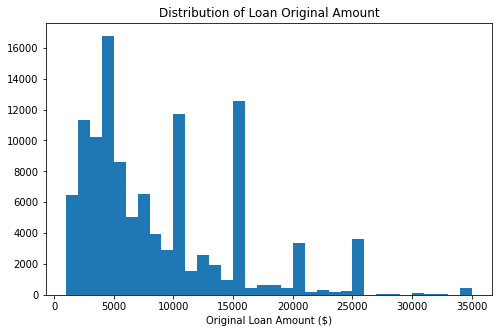

In [21]:
# Plotting histogram

bins = np.arange(min, max + 1000, 1000)
plt.figure(figsize=[8, 5])
plt.hist(data = loans_df, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original Loan Amount ($)');
plt.title('Distribution of Loan Original Amount');

* The distribution of Loan Original Amounts is multimodal, with big peaks at around USD 5000, USD 10000, and USD 15000
* The distribution is also right skewed, with the majority of the Loan Original Amounts being lower than USD 30,000

#### Plot 4: What is the Distribution of Borrowers according to Income Range?

Definition: **IncomeRange**
* The income range of the borrower at the time the listing was created.

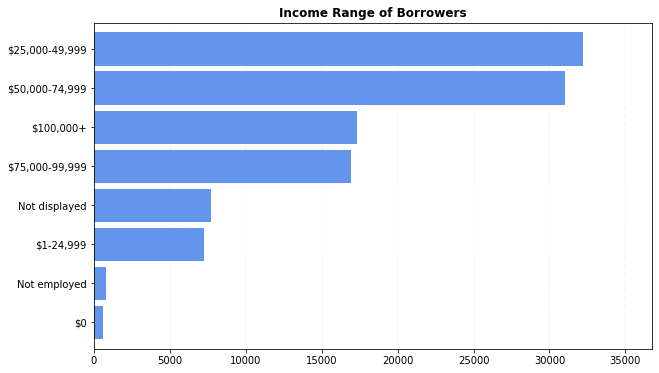

In [22]:
df_column = loans_df['IncomeRange']
title = 'Income Range of Borrowers'

# calling horizontal bar function
draw_horizontal_bar(df_column, title)

* Majority of the borrowers have an Income Range of USD 25k - 50k and USD 50k - 75k (Middle Class). This implies that Middle Class group are the greatest loan takers
* The least of the borrowers are in the group of USD 1 - 25k, "Not Employed", and USD 0
* This implies that the Unemployed and Low Income earners are at a lesser chance of being given loans; as compared to the Middle Class earner's

#### Plot 5: What is the Distribution of Stated Monthly Income?

Definition: **StatedMonthlyIncome**
* The monthly income the borrower stated at the time the listing was created

In [23]:
# Defining min and max of IncomeRange Column
min = loans_df['StatedMonthlyIncome'].min()
max = loans_df['StatedMonthlyIncome'].max()

print("Min:", min)
print("Max:", max)

Min: 0.0
Max: 1750002.916667


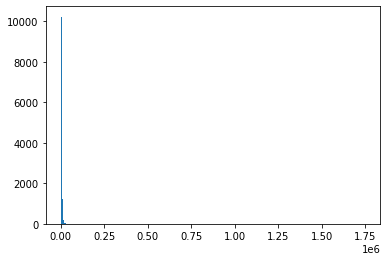

In [24]:
# Distribution of stated monthly income
bins = np.arange(min, max + 1000, 500)
plt.hist(data = loans_df, x = 'StatedMonthlyIncome', bins=bins);

* There seems to be outliers around max, hence the no detail histogram produced
* We will proceed to do a more intuitive analysis below:

In [25]:
# Checking basic statistics of 'StatedMonthlyIncome' column
loans_df['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

* The value of max seems to be an outlier (exponent power of 6 as compared to other values with exponent power of 3)
* We will limit our max to values of power 5; when plotting the histogram


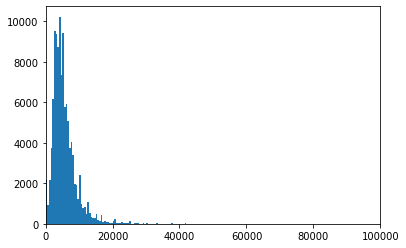

In [26]:
# Distribution of stated monthly income: With X-axis Limits 

bins = np.arange(min, max + 1000, 500)
plt.hist(data = loans_df, x = 'StatedMonthlyIncome', bins=bins);
plt.xlim(0, 100000);

* The distribution of Stated Monthly Income is greatly skewed to the right
* The greater proportion of Stated Monthly Income is below USD 20,000

In [27]:
a = loans_df[loans_df['StatedMonthlyIncome'] == 0]
a.shape

(1394, 81)

* The above statistic shows that many of the borrowers may have not stated their monthly income (that's why it is zero)

#### Plot 6: What is the Distribution of the Employment Status of the Borrowers?

Definition: **EmploymentStatus**
* The employment status of the borrower at the time they posted the listing

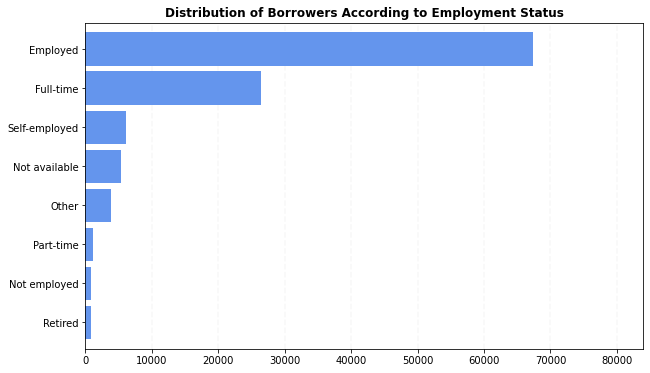

In [28]:
column = loans_df['EmploymentStatus']
title = 'Distribution of Borrowers According to Employment Status'

# Calling Horizontal Bar Chart Drawing Function
draw_horizontal_bar(column, title)

* The majority of the Borrowers have an Employment Status of "Employed"
* Conversely, the least proportion of Borrowers are in the "Other",, "Part-time", "Not employed", and "Retired" employment statuses
* This implies that lenders are more likely to give loans to employed persons, due to the security associated with employment  

#### Plot 7: What is the Distribution of Employment Status Duration of the Borrowers?

Definition: **EmploymentStatusDuration**

* The length in months of the employment status at the time the listing was created

In [29]:
# Defining min and max of IncomeRange Column
min = loans_df['EmploymentStatusDuration'].min()
max = loans_df['EmploymentStatusDuration'].max()

print("Min:", min)
print("Max:", max)

Min: 0.0
Max: 755.0


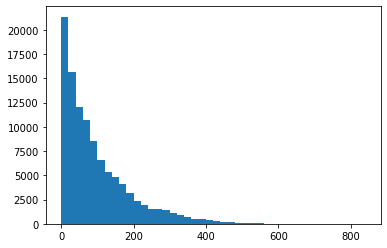

In [30]:
# Plotting histogram

bins = np.arange(min, max + 100, 20)
plt.hist(data = loans_df, x = 'EmploymentStatusDuration', bins=bins);

* The distribution of Employment Status Duration of the borrowers is unimodal, with one peak at around 0 months
* The distribution is also right skewed, with majority of the borrowers having an Employment Status Duration of less than 400 months

#### Plot 8: What is the Distribution of Debt-to-Income Ratio?

Definition: **DebtToIncomeRatio**
* The debt to income ratio of the borrower at the time the credit profile was pulled. 
* This value is Null if the debt to income ratio is not
available. 
* This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

In [31]:
# Defining min and max of Debt to Income Ratio Column
min = loans_df['DebtToIncomeRatio'].min()
max = loans_df['DebtToIncomeRatio'].max()

print("Min:", min)
print("Max:", max)

Min: 0.0
Max: 10.01


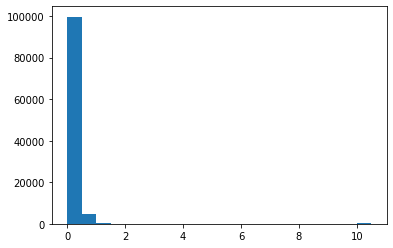

In [32]:
# Basic histogram: Bins with Interval of 0.5
bins = np.arange(min, max + 0.5, 0.5)
plt.hist(data = loans_df, x = 'DebtToIncomeRatio', bins = bins);

* The values between 9 and 10 (outliers) obscure the majority of the values, making viewing the distribution difficult
* We create a new histogram with modified X-axis limits to examine the distribution of the bulk of the values

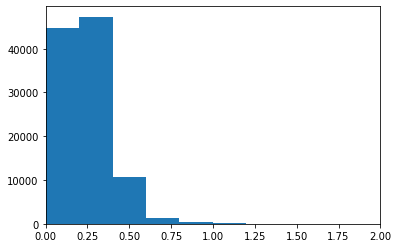

In [33]:
# New histogram with axis limits (0,2), Interval of 0.2
bins = np.arange(min, max + 0.2, 0.2)
plt.hist(data = loans_df, x = 'DebtToIncomeRatio', bins = bins);
plt.xlim((0,2)); #axis limits

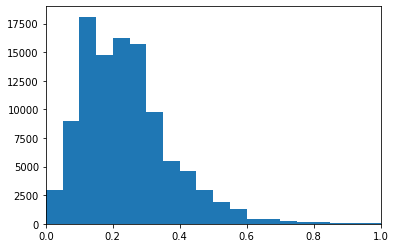

In [34]:
# New histogram with axis limits (0,1), Interval of 0.05
bins = np.arange(min, max + 0.05, 0.05)
plt.hist(data = loans_df, x = 'DebtToIncomeRatio', bins = bins);
plt.xlim((0,1));

* The histogram is skewed right, implying that the majority of the debt to income ratios lay between 0 and 0.4
* This implies that lenders pay keen attention to ensure a borrower can service the loan, by ensuring that their debt-to-income ratio is low

#### Plot 9: Which Quarter of the Year has the highest number of Loans by Origin?

Definition: **LoanOriginationQuarter**
* The quarter in which the loan was originated

Data Transformation: Splitting one Column into 2 Columns
* We need to split the LoanOriginationQuarter into two columns: LoanQuarter, LoanYear

In [35]:
# Splitting 'LoanOriginationQuarter' column into two columns: 'LoanQuarter','LoanYear'

loans_df[['LoanQuarter','LoanYear']] = loans_df['LoanOriginationQuarter'].str.split(expand=True)

In [36]:
# Checking sample of df
loans_df.sample(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanQuarter,LoanYear
78679,1B8A3577216030123A91A96,758009,2013-04-22 10:03:26.057000000,NaN,60,Current,NaN,0.24589,0.2209,0.2109,...,0.00,0.00,0.0,1.0,0,0,0.0,1,Q2,2013
96231,2843336963440155606E4E3,46845,2006-10-10 16:05:52.843000000,HR,36,Defaulted,2007-06-18 00:00:00,0.30564,0.2900,0.2850,...,1200.07,1200.06,0.0,1.0,0,0,0.0,8,Q4,2006
76291,F8633591001027942343651,977112,2013-10-14 04:58:43.800000000,NaN,36,Completed,2014-02-24 00:00:00,0.30182,0.2629,0.2529,...,0.00,0.00,0.0,1.0,0,0,0.0,30,Q4,2013


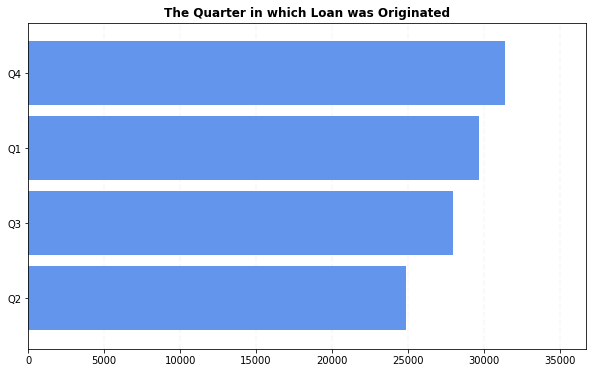

In [37]:
df_column = loans_df['LoanQuarter']
title = 'The Quarter in which Loan was Originated'

# Calling Horizontal Bar Function
draw_horizontal_bar(df_column, title)

* The plot shows that Quarter 4 is the leading quarter by loan origination
* This can point out that majority of loans are taken towards the end of the year; possibly owing to the buzz of festivities and increase in expenditures surrounding that period

#### Plot 10: What is the Distribution of Loans per Year of Origin?

Definition: **LoanYear**
* The year in which the loan was originated

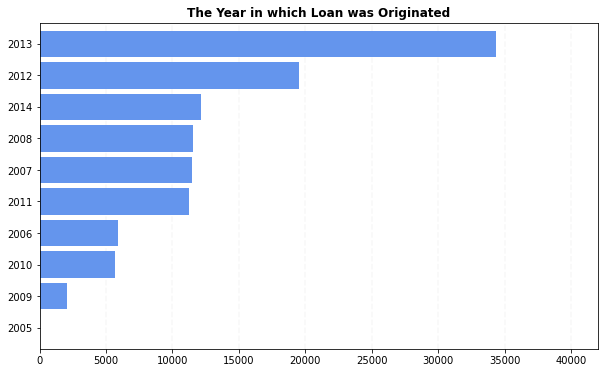

In [38]:
df_column = loans_df['LoanYear']
title = 'The Year in which Loan was Originated'

# Calling Horizontal Bar Function
draw_horizontal_bar(df_column, title)

* There is a tremendous increase in the number of loans originated from 2013,as compared to other years
* This can be attributed to the low interest rates imposed in that year; as compared to other years. Hence, the favourable interest rates spurred extensive borrowing
* Reference: [U.S. regional banks see loan growth in 2013](https://www.reuters.com/article/us-pncfinancial-results-idUSBRE90G0LD20130117)

### Discussion on Univariate Exploration

#### **Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**

* The distribution of Borrower APR is largely multimodal, with small peaks around 0.1 and 0.3. There is a large peak around 0.2
* The unusual points noted in the Borrower APR are the big steep peak around 0.35
* To explore the distribution of loans according to loan year and loan-year quarter; I split the split the LoanOriginationQuarter into two columns:
> * LoanQuarter
> * LoanYear


#### **Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

The unusual distributions I noted include:
* There is a small irrecognizable difference between distributions of loan takers who are home-owners and those who are not. 
> * This is contrary to the fact that home-owners are more likely to be given loans as compared to those who are not; as there is more security assured with the lending
* There is also a great discrepancy between the distributions of Stated Monthly Income and Income Range. 
> * Majority of the borrowers have an Income Range of USD 25k - 50k; while majority of borrowers have a Stated Monthly Income of below USD 20k. 
> * The two variables are closely related, hence their distributions should not be counter-intuitive

The operation I undertook that changed the form of the data is the splitting of the LoanOriginationQuarter into two columns: LoanQuarter, and LoanYear
* The transformation is to facilitate an exploration of the column on a deeper scale; as compared to as just a single variable


## Bivariate Exploration

* In this section, I will investigate relationships between two variables. I have split the exploration into two parts:
> * Part 1: Relationships between Quantitative Variables
> * Part 2: Relationships of Quantitative Vs. Qualitative Variables 

### Part 1: Relationships between Quantitative Variables

#### Some Basic Data Preparation from Insights gotten in Univariate Exploration

In [39]:
loans_df.shape

(113937, 83)

* Records of loans which have Stated Monthly Income greater than USD 30,000 are outliers (Refer to Plot 5 above)
* We preprocess the data by removing the outliers

In [40]:
# filtering data to remove outliers
loans_clean_df = loans_df[loans_df['StatedMonthlyIncome'] <= 30000]
loans_clean_df.shape

(113610, 83)

* We also need to remove records with missing BorrowerAPR

In [41]:
# Remove loans with null BorrowerAPR
loans_final_df = loans_clean_df[~loans_df['BorrowerAPR'].isna()]
loans_final_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(113585, 83)

#### Plot 11: What is the correlation between the features of interest?

In [42]:
# Function to draw Correlation Matrix as Heatmap
def plot_correlation(features):
  features = features
  plt.figure(figsize = [9, 7])
  sb.heatmap(loans_final_df[features].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

In [43]:
# Function to draw Scatter Plots
def plot_scatter(df, features):
  g = sb.PairGrid(data = df, vars = features)
  g = g.map_diag(plt.hist, bins=20)
  g.map_offdiag(plt.scatter, alpha=0.2);

In [44]:
# defining numerical features of interest
features = ['BorrowerAPR', 'ProsperScore', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'EmploymentStatusDuration', 'DebtToIncomeRatio']

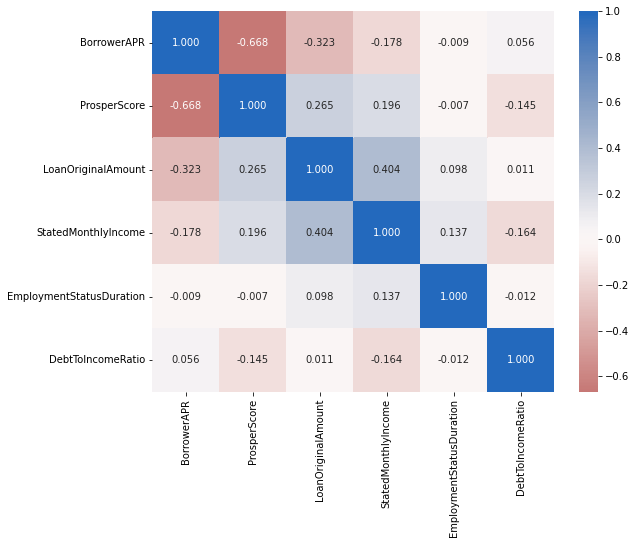

In [45]:
# Calling Correlation Function with Features
plot_correlation(features)


* The correlation matrix heatmap shows that there is a weak positive correlation (0.404) between the Loan Original Amount and the Stated Monthly Income. 
> This is in tandem with basic knowledge that the more a borrower earns, the more they can borrow (greater loan limit)
* Conversely, there is a weak negative correlation (-0.323) between the Loan Original Amount and the Borrower APR
> This implies that the more the loan amount borrowed, the lower the APR (interest) charged for the loan
* There is a strong negative correlation (-0.668) between the Prosper Score and the Borrower APR
> This shows that as the borrower's Prosper Score increases (as risk reduces), the APR decreases. By convention, less risk loans have less APR
* There is a weak negative correlation (-0.164) between Stated Monthly Income and Debt to Income Ratio
> This implies that as the Stated Monthly Income increases, then the Debt to Income Ratio reduces

In [46]:
# Sample few loans for faster correlation plotting
loans_sampled_df = loans_final_df.sample(6000)
loans_sampled_df.shape

(6000, 83)

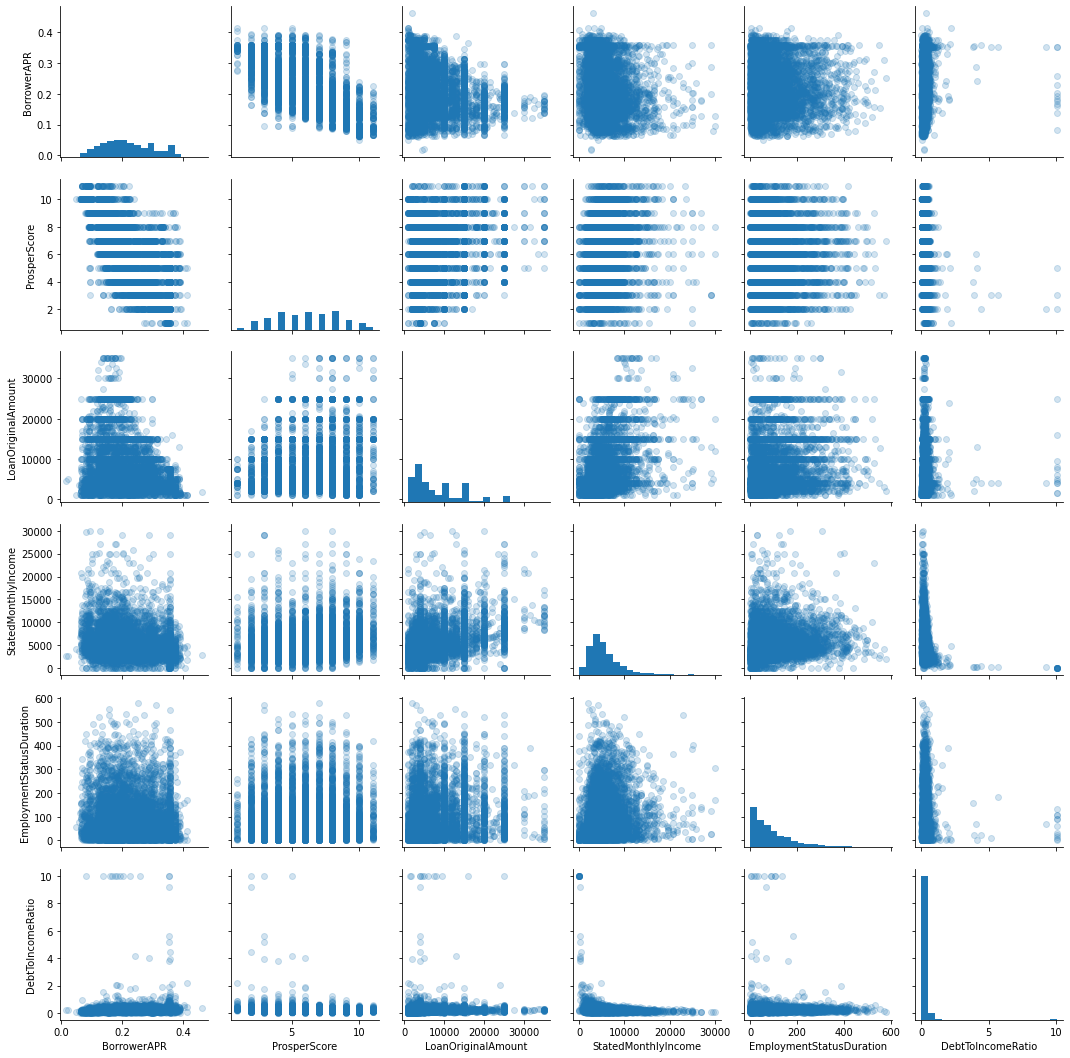

In [47]:
# Plotting Scatter Plots of Features
plot_scatter(loans_sampled_df, features)

* The above scatter plots confirm the results obtained from the correlation matrix above
* While "Correlation is not Causation", the above results show some interesting patterns between the features

### Part 2: Relationships of Quantitative Vs. Qualitative Variables

####Defining Function for Drawing Violin Plot

In [48]:
def draw_violin_plot(df, x_column, y_column):

  base_color = sb.color_palette()[0]

  sb.violinplot(data=df, x=x_column, y=y_column, color=base_color)
  plt.xticks(rotation=15);

#### Plot 12: What is the effect of Employment Status on Borrower APR?

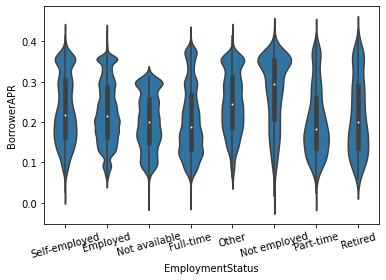

In [49]:
# Calling violin plot drawing function

draw_violin_plot(loans_final_df, 'EmploymentStatus', 'BorrowerAPR')

* Borrowers who have "Not Employed" and "Other" as their Employment Statuses have the highest Borrower APR's. This can be attributed to the increased risk of lending such people money; which has to be countered by increasing the APR

#### Plot 13: What is the Relationship Between Home-owners and Loan Original Amount

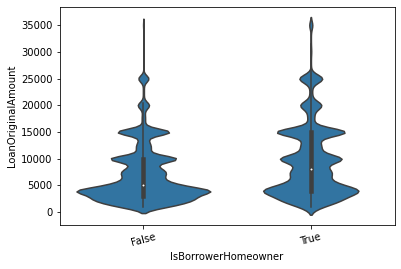

In [50]:
# Calling violin plot drawing function

draw_violin_plot(loans_final_df, 'IsBorrowerHomeowner', 'LoanOriginalAmount')

* The plot shows that people who are home-owners are able to borrow more; as compared to people who are not home-owners. 
* This can be explained in part by the security associated with having a home; which can be used as collateral in the loan

#### Plot 14: How does the Income Range compare with the Loan Original Amount?

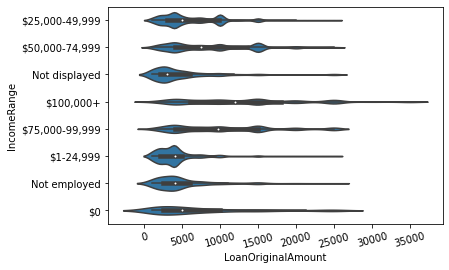

In [51]:
# Calling violin plot drawing function

draw_violin_plot(loans_final_df, 'LoanOriginalAmount', 'IncomeRange')

* The plot shows that the people with the highest loan original amount are borrowers in the income range of USD 100,000+; and the least are in the income ranges of "Not employed", "USD 1 - 25,000", and "Not Displayed"
* This implies that the more you earn, the more you can borrow

#### Plot 15: How does the Loan Original Amount compare with the Year of Loan Origin? 

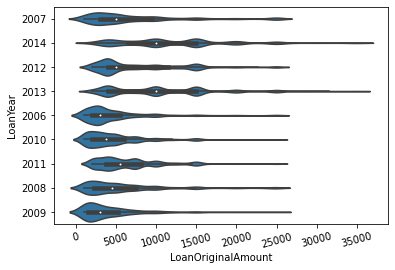

In [52]:
# Calling violin plot drawing function

draw_violin_plot(loans_final_df, 'LoanOriginalAmount', 'LoanYear')

* The highest proportion of Loan Original Amounts are in the years of 2013 and 2014
* This result is an addition to the observation in Plot 10 above; which lays out that there was a surge in the number of loans borrowed between 2013 - 2014; due to the favorable interest rates in that period
* Reference: [U.S. regional banks see loan growth in 2013](https://www.reuters.com/article/us-pncfinancial-results-idUSBRE90G0LD20130117)

### Discussion on Bivariate Exploration

#### **Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

* Borrower APR vs. Loan Original Amount
> * There is a weak negative correlation (-0.323) between the Loan Original Amount and the Borrower APR
> * This implies that the more the loan amount borrowed, the lower the APR (interest) charged for the loan


* Borrower APR vs. Employment Status
> * Borrowers who have "Not Employed" and "Other" as their Employment Statuses have the highest Borrower APR's. 
> * This can be attributed to the increased risk of lending such people money; which has to be countered by increasing the APR

* Debt to Income Ratio vs. Stated Monthly Income
> * There is a weak negative correlation (-0.164) between Stated Monthly Income and Debt to Income Ratio
> * This implies that as the Stated Monthly Income increases, then the Debt to Income Ratio reduces


#### **Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

* Loan Original Amount vs. Is Home-owners:
> * People who are home-owners are able to borrow more; as compared to people who are not home-owners. 
> *This can be explained in part by the security associated with having a home; which can be used as collateral in the loan

* Loan Original Amount vs. Income Range: 
> * There is a positive relationship between the Income Range and the Loan Original Amount.
> * This implies that the more you earn, the more you can borrow

## Multivariate Exploration

> Here, I will create plots of three or more variables to ensure a more in-depth exploration of the features

#### Plot 16: How does the Loan Term and the Prosper Score affect the Borrower APR? 

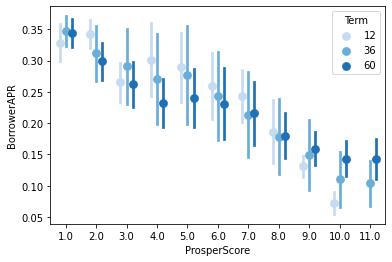

In [53]:
sb.pointplot(data = loans_sampled_df, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd');

* The plot shows that there is an inverse relationship between Borrower APR; and Term and Prosper Score
* Thus, Borrower APR decreases as the Loan Term and Prosper Score increase

#### Plot 17: How does the Loan Term and the Prosper Score affect the Loan Original Amount?

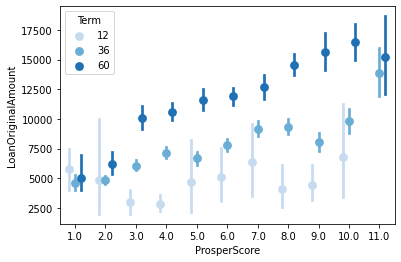

In [54]:
# drawing visualization
sb.pointplot(data = loans_sampled_df, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4);

* The key observation from the plot above is that Loan Original Amount; and Prosper Score and Term share a positive relationship 
* The plot shows that the Loan Original Amount increases as the Prosper Score increases, and also as the Loan Term increases 

#### Plot 18: What is the effect of Prosper Score on Borrower APR and Loan Original Amount?

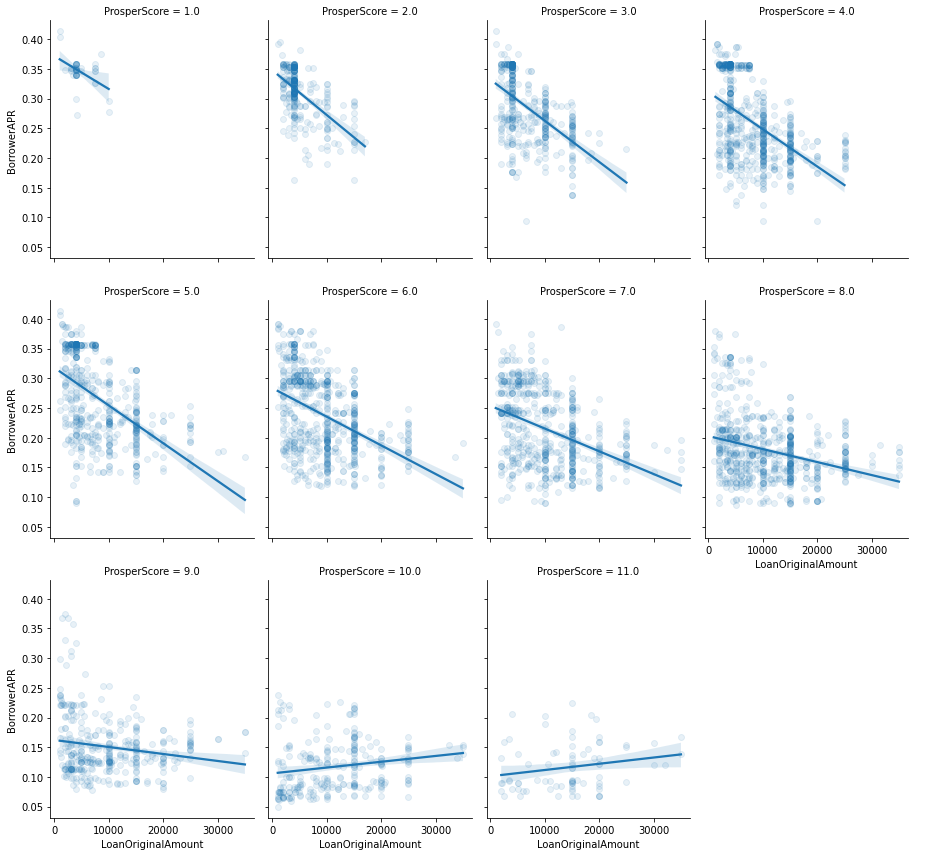

In [55]:
# Prosper Score effect on relationship of APR and loan amount

g=sb.FacetGrid(data=loans_sampled_df, aspect=0.8, height=4, col='ProsperScore', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

* The plots show that the Loan Original Amount increase with an increase in the Prosper Score and a decrease in Borrower APR
* However, when the Prosper Score is above 9 (best Prosper Scores) and the Loan Original Amount increases; there is an abnormal behaviour of the Borrower APR increasing
* This can be explained in part by the propensity of people with better Prosper Scores borrowing bigger loans; which creates a high demand for the loans; and a corresponding increase in Borrower APR
* This is to maximize on profits, going by the Law of Supply and Demand

### Discussion on Multivariate Exploration

#### **Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

* Borrower APR vs. Loan Term and Prosper Score
> * There is an inverse relationship between Borrower APR; and Term and Prosper Score. Thus, Borrower APR decreases as the Loan Term and Prosper Score increase

* Loan Original Amount vs. Loan Term and Prosper Score
> * The Loan Original Amount; and Prosper Score and Term share a positive relationship. Hence, the Loan Original Amount increases as the Prosper Score increases, and also as the Loan Term increases  

#### **Were there any interesting or surprising interactions between features?**

* Prosper Score vs. Borrower APR and Loan Original Amount
> * The plots show that the Loan Original Amount increase with an increase in the Prosper Score and a decrease in Borrower APR
> * However, there is an interesting and surprising observation from the three features
> * When the Prosper Score is above 9 (top ratings) and the Loan Original Amount increases; there is an abnormal behaviour of the Borrower APR increasing
> * This can be explained in part by the propensity of people with better Prosper Scores borrowing bigger loans; which creates a high demand for the loans; and a corresponding increase in Borrower APR
> * The anomalous observation can be attributed to the maximizing on loan profits by the lenders, going by the Law of Supply and Demand

## Conclusions
>

* This notebook is an exploration of the Loan Data from Prosper dataset
* The analysis employs univariate, bivariate and multivariate exploratory data visualizations to draw insights from the data
* Notable insights gotten from the analysis include:
> * There is a weak negative correlation (-0.323) between the Loan Original Amount and the Borrower APR
>> Hence, the more the loan amount borrowed, the lower the APR (interest) charged for the loan
> * Borrowers who have "Not Employed" and "Other" as their Employment Statuses have the highest Borrower APR's.
>> This is due to the increased risk of lending money to people with those statuses; which has to be countered by increasing the APR
> * People who are home-owners are able to borrow more; as compared to people who are not home-owners.
>> This can be attributed to the security associated with having a home; which can be used as collateral in the loan
> * There is a positive relationship between the Income Range and the Loan Original Amount
>> Thus, the more you earn, the more you can borrow
> * There is an inverse relationship between Borrower APR; and Term and Prosper Score
>> This implies that the Borrower APR decreases as the Loan Term and Prosper Score increase
> * The Loan Original Amount; and Prosper Score and Term share a positive relationship.
>> Therefore, the Loan Original Amount increases as the Prosper Score increases, and also as the Loan Term increases
> * The Loan Original Amount increases with an increase in the Prosper Score and a decrease in Borrower APR (which is expected by convention)
> * However, when the Prosper Score is above 9 (top ratings) and the Loan Original Amount increases; there is an abnormal behaviour of the Borrower APR increasing
>>  This can be expounded by the increase in the demand of bigger loans from borrowers with best Prosper Scores; which leads to an increase in Borrower APR to heighten loan profits (Law of Demand and Supply)






